In [14]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt
import numpy as np
import time

with open("0201.xml", "r") as f:
  xml10 = f.read()

with open("02015.xml", "r") as f:
  xml15 = f.read()

with open("0202.xml", "r") as f:
  xml20 = f.read()

with open("02025.xml", "r") as f:
  xml25 = f.read()

xmls = [xml10, xml15, xml20, xml25]

0
1 10cm
0
2 15cm
0
3 20cm
0
4 25cm


Text(0, 0.5, 'mean end effector (feet) force')

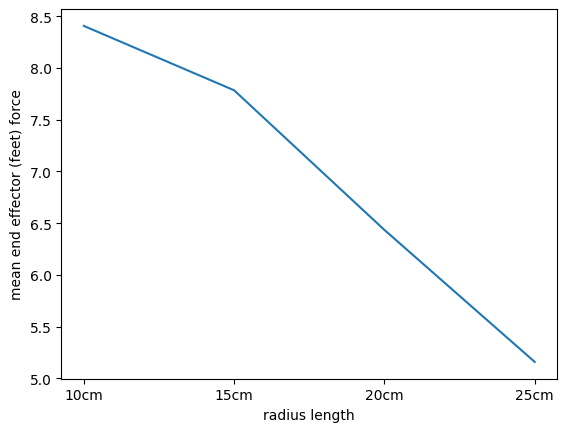

In [26]:

meanss = []
ihihi = []
timevals = []
contact = []
duration = 7    # (seconds)


w = 0
for xml in xmls:
  if 'model' in locals():
    del model
  if 'data' in locals():
    del data
  
  model = mujoco.MjModel.from_xml_string(xml)
  renderer = mujoco.Renderer(model)
  data = mujoco.MjData(model)
  mujoco.mj_forward(model, data)
  print(j)


  # Simulate and save data
  mujoco.mj_resetDataKeyframe(model, data, 0)
  i = 0
  while data.time < duration:
    data.ctrl = [0, 80, 80, 0]
    mujoco.mj_step(model, data)
    timevals.append(data.time)
    
    forcetorque = np.zeros(6)
    contact.append(0)
    for j,c in enumerate(data.contact):
      mujoco.mj_contactForce(model, data, j, forcetorque)
      contact[i] += np.linalg.norm(forcetorque[0:3])

    i += 1
  
  contacte = contact[int(len(contact)*0.1):]
  name = str(10+w*5)+'cm'
  w = w + 1
  print(w, name)
  meanss.append(np.mean(contacte))
  ihihi.append(name)
plt.plot(ihihi, meanss)
plt.xlabel('radius length')
plt.ylabel('mean end effector (feet) force [N]')